In [3]:
data_path = '../data/Philippe2009/UPDUNN_MB.nex'

In [10]:
from reprophylo import *
def parse_philippe_mrbayes_partitions(mrbayes_nexus):
    with open(mrbayes_nexus) as partfile:
        lines = partfile.readlines()
        parts = {}
        gene_names = []
        ranges = []
        for line in lines:
            if '[genes' in line:
                gene_names = line.rstrip().split(':')[1].replace(']','').split(',')
            if 'partition part = ' in line:
                ranges = line.rstrip().split(':')[1].replace(';','').split(',')
                ranges = [i.split('-') for i in ranges]
        for j in range(len(gene_names)):
            parts[gene_names[j]] = [int(ranges[j][0])-1,
                                    int(ranges[j][1])]
        return parts
    

def pj_from_nexus(phylip_filename, charsets ,output_dir, char_type,
                            feature_type, project=False, pickle=False, git=False):
    
    
    from reprophylo import Locus
    from Bio import AlignIO
    
    alignment =  AlignIO.read(phylip_filename, 'nexus')
    filenames = []
    loci_list = []
    for locus_name in charsets:
        s = charsets[locus_name][0]
        e = charsets[locus_name][1]
        outname = "%s/%s.fasta"%(output_dir,locus_name)
        AlignIO.write(alignment[:, s:e], outname, 'fasta')
        filenames.append(outname)
        loci_list.append(Locus(char_type, feature_type, locus_name, [locus_name]))
    
    if project:
        from reprophylo import Project
        pj = Project(loci_list, pickle=pickle, git=git)
        i=1
        for f in filenames:
            locus_name = f.split('/')[-1].split('.')[0]
            print '%i/%i reading %s'%(i,len(filenames), locus_name)
            i += 1
            pj.read_alignment(f, char_type, feature_type, locus_name)
        return pj
            
    else:  
        return filenames, loci_list

In [11]:
if not os.path.exists('../data/Philippe2009/fastaalns'):
    os.mkdir('../data/Philippe2009/fastaalns')
    
fasta_dir = '../data/Philippe2009/fastaalns'

In [13]:
charsets = parse_philippe_mrbayes_partitions(data_path)
pj = pj_from_nexus(data_path,
                   charsets,
                   fasta_dir,
                   'prot',
                   'PROT',
                    project=True,
                    pickle='Philippe2009',
                    git=True
                  )

/home/amir/Dropbox/python_modules/rpgit.py:74: UserWarning: Thanks to Stack-Overflow users Shane Geiger and Billy Jin for the git wrappers code
  warnings.warn('Thanks to Stack-Overflow users Shane Geiger and Billy Jin for the git wrappers code')
/home/amir/Dropbox/python_modules/rpgit.py:90: UserWarning: A git repository was created in /home/amir/Dropbox/basal_metazoa/Philippe2009.
  warnings.warn('A git repository was created in %s.'%repoDir)
/home/amir/Dropbox/python_modules/reprophylo.py:255: UserWarning: The new repository is called Philippe2009.
  warnings.warn('The new repository is called %s.'%open(cwd + '/.git/description', 'r').read().rstrip())
DEBUG:Cloud:Log file (/home/amir/.picloud/cloud.log) opened
DEBUG:Cloud:Deleting 5871.lock (7.13156504163 days old)
DEBUG:Cloud:Deleting 3969.lock (9.13018512757 days old)
DEBUG:Cloud:Deleting 5871.log (7.13156504163 days old)
DEBUG:Cloud:Deleting 3969.log (9.13018512757 days old)


1/150 reading tribe1378
dropping seq tribe1378 in locus Saccharomyces_cerevisiae_______________________________________________________: missing data
dropping seq tribe1378 in locus Euperipatoides_kanangrensis____________________________________________________: missing data
dropping seq tribe1378 in locus Spinochordodes_tellinii________________________________________________________: missing data
dropping seq tribe1378 in locus Boophilus_microplus____________________________________________________________: missing data
dropping seq tribe1378 in locus Acanthoscurria_gomesiana_______________________________________________________: missing data
dropping seq tribe1378 in locus Anoplodactylus_eroticus________________________________________________________: missing data
dropping seq tribe1378 in locus Carcinoscorpius_rotundicauda___________________________________________________: missing data
dropping seq tribe1378 in locus Carcinus_maenas_______________________________________________

In [14]:
print pj.records[0].format('genbank')

LOCUS       denovo0                   98 aa                     UNK 01-JAN-1980
DEFINITION  .
ACCESSION   denovo0
VERSION     denovo0
KEYWORDS    .
SOURCE      .
  ORGANISM  .
            .
FEATURES             Location/Qualifiers
     source          1..98
                     /feature_id="denovo0_source"
                     /original_id="Cryptococcus_neoformans______________________
                     __________________________________"
                     /original_desc
     PROT            1..98
                     /feature_id="denovo0_f0"
                     /gene="tribe1378"
                     /prot_degen_prop="0.0"
ORIGIN
        1 sqisldhglt kvwvkqdgvp egthqlepli pgyifhpllv tvlvlepiak enyfipkngm
       61 nmlgllkspm vlmmlfsgim mwgmpkllsn mdpefske
//



In [15]:
# mock trimming
trimal = TrimalConf(pj, method_name='noallgaps', trimal_commands={'noallgaps': True})

trimal -in 649801433804914.11_tribe895@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_tribe585-A@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_rps15@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_eif5a@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_rps11@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_tribe893@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_rpl14a@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_tribe1200@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_tribe756@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_tribe1132@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_rpl9@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_rla2-A@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_tribe333@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_tribe1015@ReadDirectly.fasta -noallgaps
trimal -in 649801433804914.11_tribe435@ReadDir

In [16]:
pj.trim([trimal])

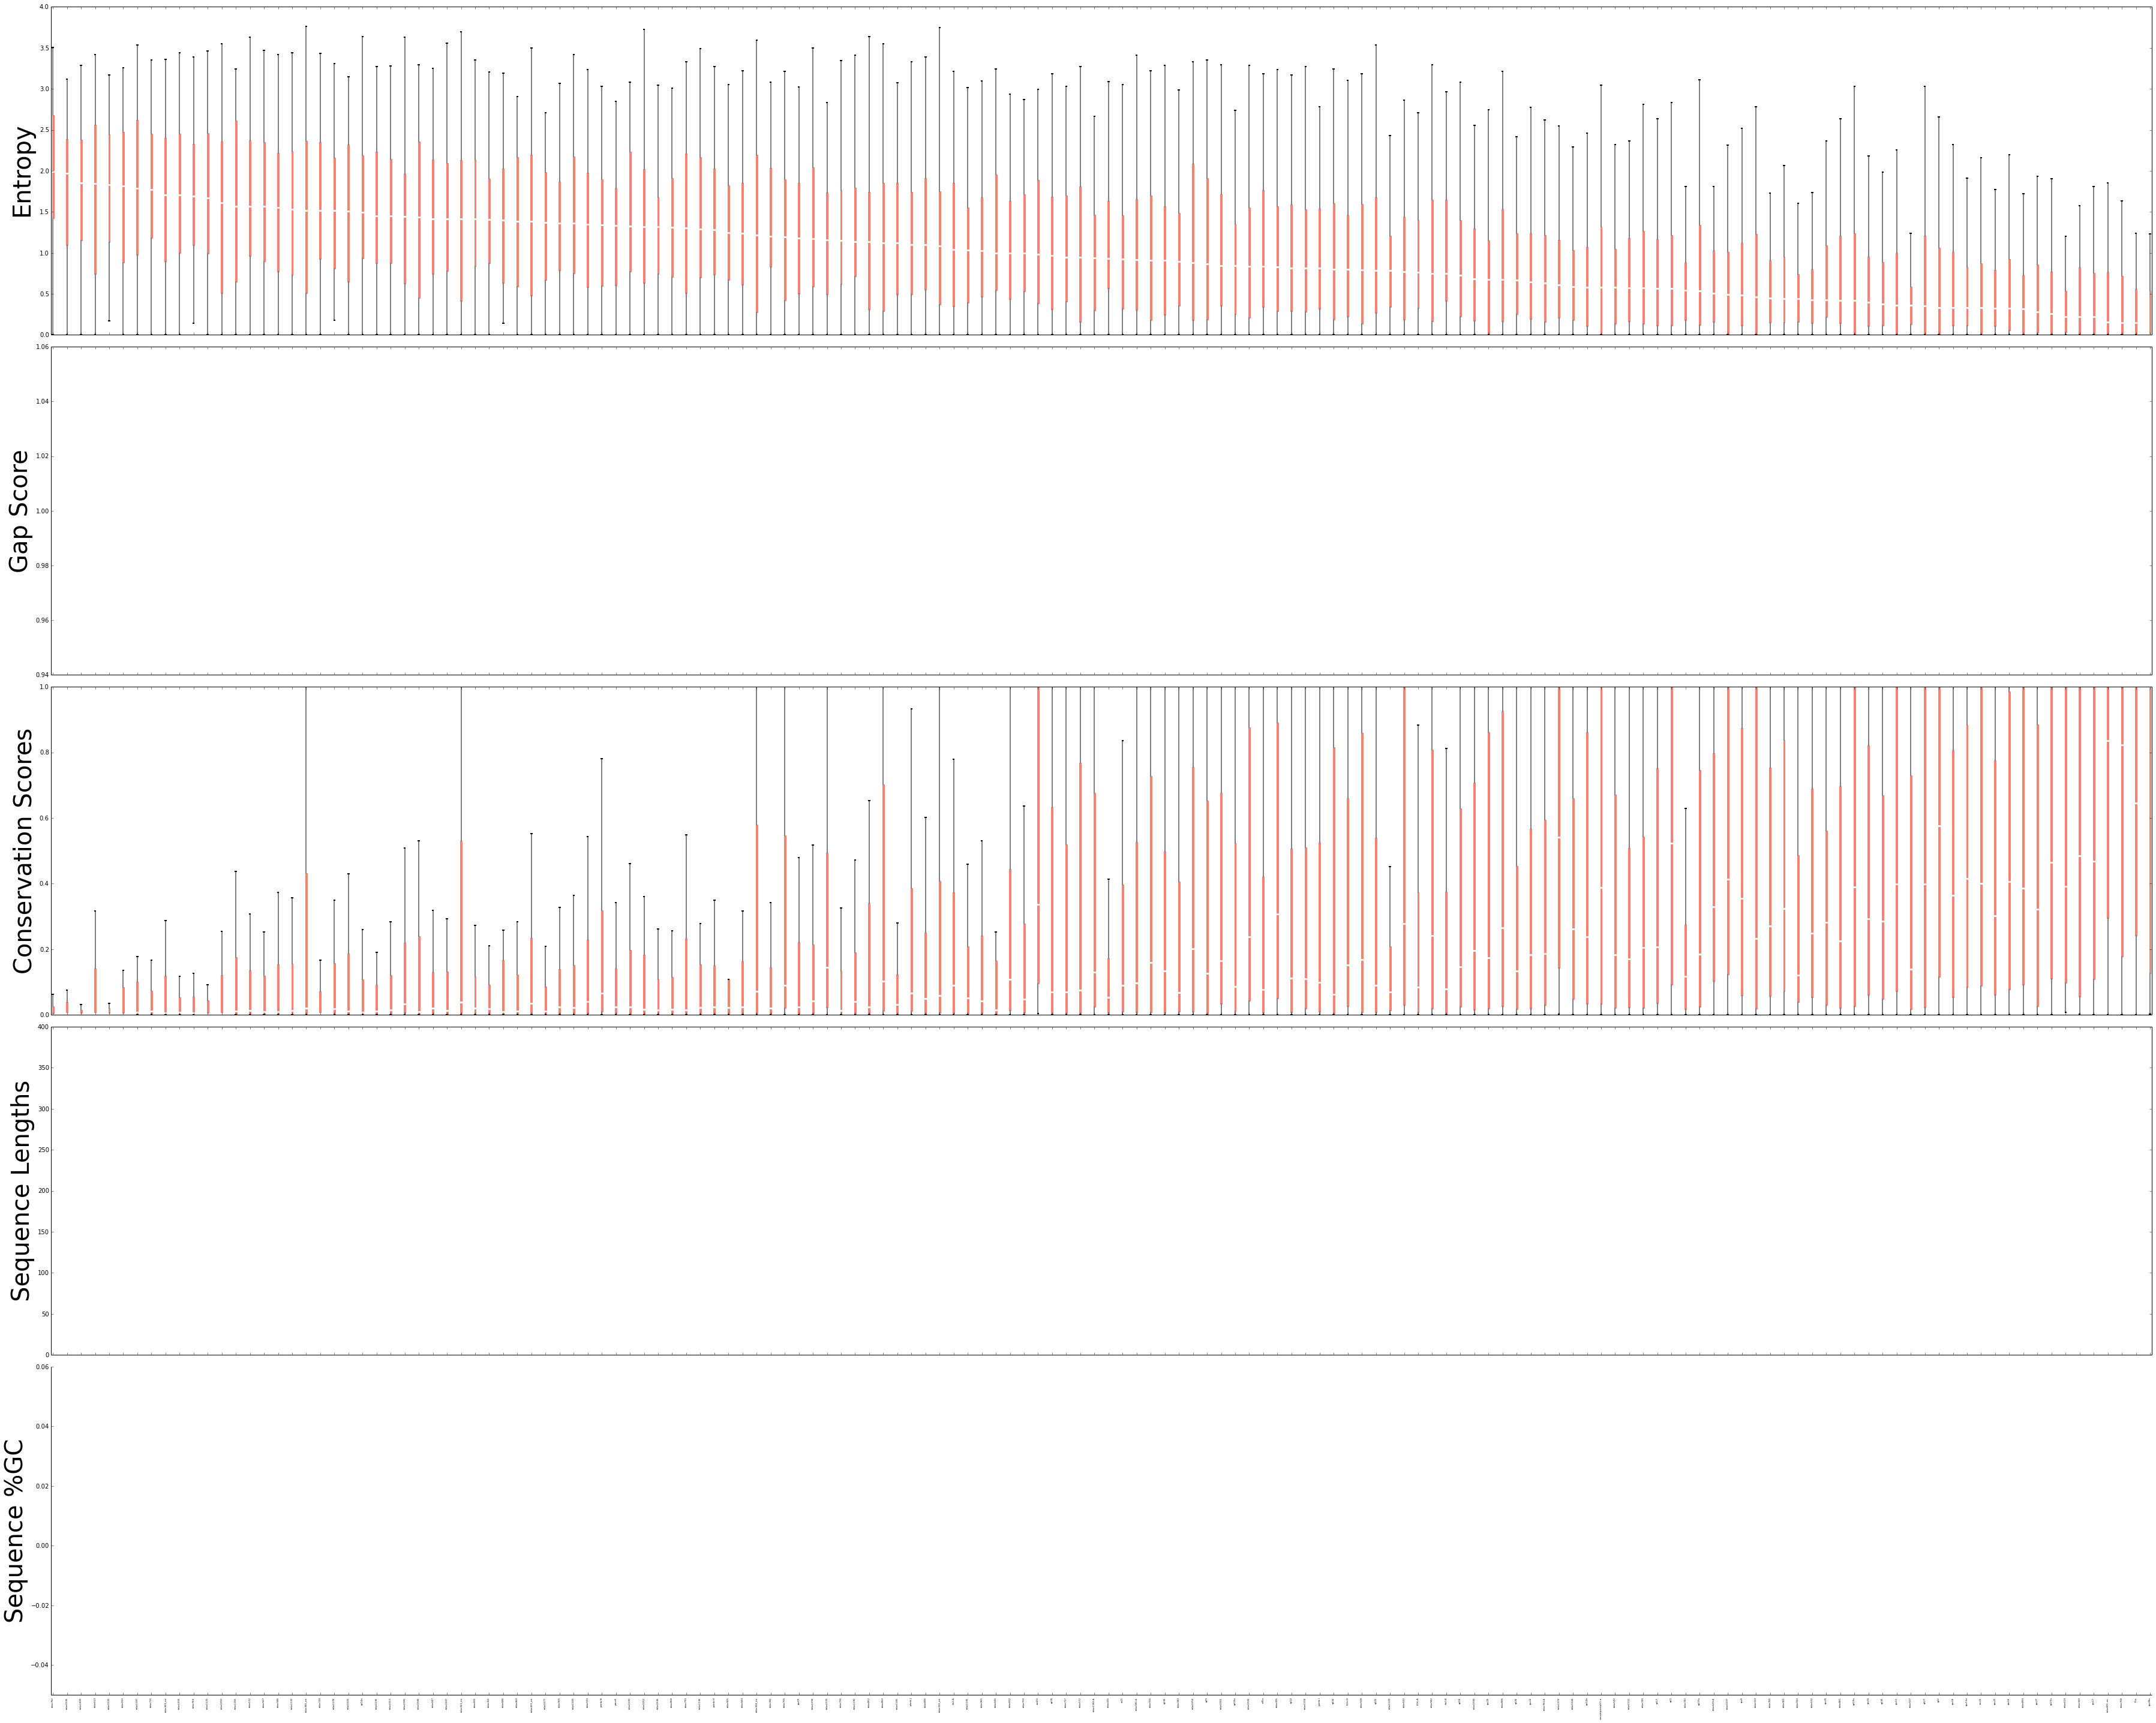

In [19]:
loci_entropy = LociStats(pj)
loci_entropy.sort()
%matplotlib inline
loci_entropy.plot('figures/sort_by_entropy.png', figsize=[50,40], ytick_fsize=8)

In [20]:
pj.write_trimmed_alns()

['rpl36@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe1118@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe380_mt@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'rpl14a@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe320@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe896@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe1245@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'rps20@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe1190@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe782@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe942@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe905@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe739@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe742@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'rpl18@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe613@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'tribe1121@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'rps8@ReadDirectly@noallgaps_trimmed_aln.fasta',
 'rps16@ReadDirectly@noallgaps_trimm